# Quantitative Analysis: Monte Carlo in Finance

## Introduction

In the quest to gain a better understanding of the financial market, I decided to look into the quantitative finance. I had been applying to some jobs and heard about Monte Carlo and stochastic calculus in finance positions. I never heard of stochastic calculus, but I have heard of Monte Carlo, as it is also used in quantum physics for modeling certain phenomena. After some research on Google, YouTube and Skillshare I discovered how to use Monte Carlo (MC) to predict stock prices in Python and Excel. Here I try to use what I learned and replicate the results. It was first done in Spyder and now I am transferring it onto a Jupyter notebook for portfolio purposes and for better readability.

Along with MC, in this module I use web scraping and APIs and data visualization.

Although I am definitely far from expert, I used this to have a basic understanding of the mathematical models used in finance to predict stock market or asset prices over time. 

## What is Monte Carlo?

Monte Carlo (from my understanding) is a deterministic algorithm whose output has a small probability of incorrectness. It is most famous for being used for gambling purposes, but is widely used in finance to better predict stock market prices. One way to predict stock prices was explained as:

$$Today's Stock Price = Yesterday's Stock Price * e^r$$

where *r* is the periodic daily return with continous compounding (similar to exponential growth equation $Y=Ae^{rt}$). The MC generates possible r values, keeping in mind the Brownian motion of stock price changes. Brownian motion is a formula used to describe random motion in physics, and also variations in stock. I don't have a full in-depth understanding of Brownian motion yet, but I know it is based off of stochastic calculus and is the random component. 

Basically, one can think of it as:

Amount of Change in Stock Price = Expected Growth Rate over Time (aka Fixed Drift Rate) + Uncertainty caused by volatility (Random stochastic variable)

This helped me to get the gist of how stock price models are set up and the role MC plays in helping to predict the rate.

Sources:
- Monte Carlo algorithm (https://en.wikipedia.org/wiki/Monte_Carlo_algorithm)
- Understanding and Creating Monte Carlo Simulation Step By Step (https://www.youtube.com/watch?v=3gcLRU24-w0)
- Simple Monte Carlo Simulation of Stock Prices with Python (https://www.youtube.com/watch?v=_T0l015ecK4&t=682s)

### Monte Carlo in Python

This is from Skillshare quant finance course on using quant analysis with Python. This course is a good intro into coding with finance. I have included some of my notes with the code and in upcoming markdowns of things I learned and skills gained.

In [6]:
#Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader.data as pdr #used to read finance data, has many different companies/banks
import datetime as dt

#First step is to find the data you wish to work with via APIs (or webscraping). Thats where pandas_datareader comes in!
#We use the Yahoo! Finance API to get data

ticker = "AMZN" #name of stock; make sure in right format for wherever data is being retrieved
#Step 2. Choose a time interval you wish to work with
start_date = dt.date.today() - dt.timedelta(365) #gets date from end date and minus 1 year
end_date = dt.date.today()

#interval=m puts it by month, otherwise it does by days automatically (252 rows instead of 13)
data = pdr.get_data_yahoo(ticker, start_date, end_date) #makes data set based on date of stocks


The above is the initial set up of everything. You could technically use more than one ticker (stock) and use MC to predict them all, but to save time and to not overload my personal computer, I just did one. MC runs pretty fast though, even for 1000 simulations, so maybe in the future I will try to do 2 or more. The coding for data retrieval of multiple stocks is a bit more taxing based on what I have seen, but in the future I will tackle it and do multiple stocks.

Now to continue further with the Monte Carlo process.

In [2]:
#Step 3. Retrieve closing stock prices and periodic daily returns from those prices
prices = data['Adj Close']
returns = prices.pct_change() #takes percentage of change from today and yesterday's price for each day
#antoher way to do pct_change: (prices/prices.shift(1))-1   shift() moves a column down or up by input number (1)

#Step 4. Specify the most recent price, along with the number of simulations to run and the time horizon to predict
last_price = prices[-1] 
num_simulations = 1000 #the more simulations the more accurate your MC is
num_days = 252

simulation_df = pd.DataFrame() #data frame to put simulation results into

#Monte Carlo Simulation
for x in range(num_simulations):
    count = 0 #initializes count
    daily_vol = returns.std() #standard deviation of returns is basically volatilty
    price_series = []
    
    price = last_price*(1+ np.random.normal(0, daily_vol)) #Monte Carlo eqn, same as normsinv() in excel
    price_series.append(price)
    
    for y in range(num_days):
        if count == 251:  #make sure it doesn't go past our set time horizon
            break
        price = price_series[count]*(1+ np.random.normal(0, daily_vol)) #does calculation based on last count of price
        price_series.append(price)
        count += 1 #increases count by 1
        
    simulation_df[x] = price_series #creates a series  of prices each day for each simulation
    
avg_price_change = simulation_df.mean()

So using the equation described above, the main idea is to find the variables you need and put them into the equation. For each simulation, it does a prediction of 252 days since the most recent stock price, and performs this prediction using the MC. The randomness is taken into account, along with the principle of normality in the distribution of the returns and volatility.

'`price_series`' will have 252 entries, so the `simulation_df` will have 1000 columns each with 252 rows of price predictions.

I am assuming based off intuition that the `(1+ np.random.normal(0, daily_vol))` in the main MC equation for price is the Taylor expansion of an exponential to the first order, for all the higher orders are negligible in this case (i.e. $e^x=1+x$ for $x << 1$) but not entirely certain.

In [5]:
print(simulation_df.shape)
simulation_df.head()

(252, 1000)


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1850.468281,1869.841676,1926.113406,1883.324394,1905.030492,1924.779621,1913.327132,1848.342335,1894.664705,1877.559224,...,1911.566492,1888.389259,1915.161768,1907.096398,1899.922842,1925.931357,1909.849043,1911.491617,1910.916984,1924.692547
1,1831.265595,1826.240585,1946.456932,1844.586888,1900.428453,1971.604545,1949.859839,1850.684758,1885.146287,1893.966161,...,1875.080799,1935.317282,1902.858808,1896.034643,1844.984100,1929.751373,1926.012201,1895.291910,1917.357064,1913.271632
2,1850.212992,1819.270974,1978.516702,1894.294919,1927.341000,1991.077386,1937.051660,1871.896347,1883.637050,1890.123435,...,1922.171813,1992.264310,1876.859121,1936.761466,1870.481455,1916.125632,1984.242334,1862.073764,1932.196564,1936.143757
3,1846.705662,1791.303801,1923.936718,1908.449444,1902.155186,1996.729941,1879.194632,1838.288847,1882.207326,1912.900253,...,1912.993438,1971.990762,1853.777588,1960.786763,1850.942979,1929.170304,2014.806701,1862.978447,1968.053401,1946.583879
4,1868.216021,1797.024847,1943.976170,1928.399914,1875.478650,1990.664470,1944.483765,1814.797018,1909.075072,1900.013502,...,1875.456458,1961.396198,1844.506791,2025.324750,1852.032381,1960.471343,2001.297878,1821.609440,1931.260532,1941.537166


## Data Visualization: Graphing Stock Prices of Monte Carlo

To visualize and thus gain a better understand of the trend of the Amazon stock prices, I simply use matplotlib. I could use the built-in for pandas to do the lineplots, or seaborn, but for now I just used matplotlib.pyplot. 

Text(0, 0.5, 'Frequency')

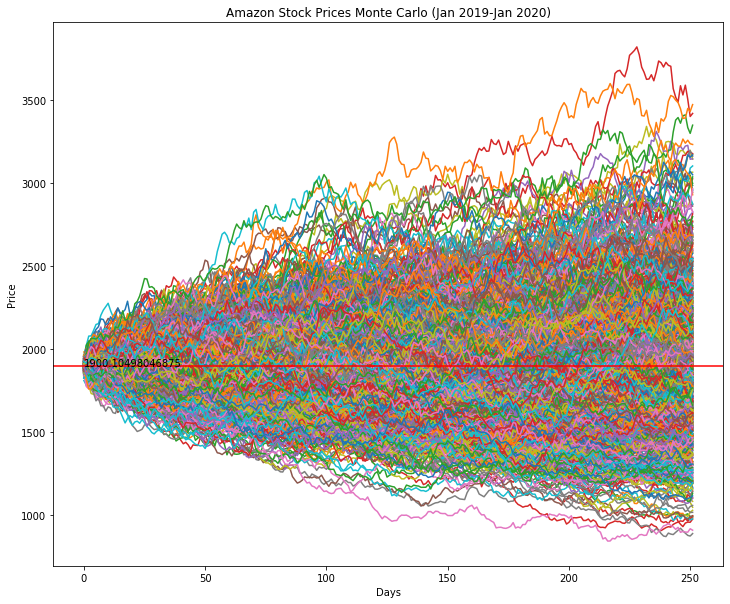

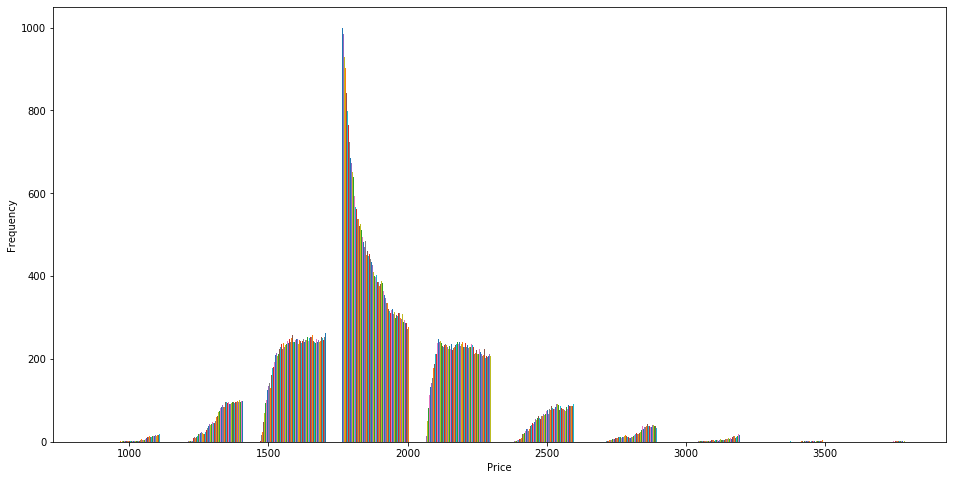

In [11]:
#lineplot
plt.figure(figsize=(12,10))
plt.plot(simulation_df)
plt.axhline(last_price, color='r')
plt.annotate(str(last_price), (0,last_price))
plt.title("Amazon Stock Prices Monte Carlo (Jan 2019-Jan 2020)")
plt.xlabel('Days')
plt.ylabel('Price')
#histogram
plt.figure(figsize=(16,8))
plt.hist(simulation_df)
plt.xlabel('Price')
plt.ylabel('Frequency')

Since we had so many simulations, there are alot of data to plot and it makes it hard to see real trends. I could make a subplot of each individual run, but that would also be many different charts to look at. You can kind of see better in the histogram, that the price stays between 1500 and 2000 for the most part, which is something. The most recent stock price is represented by the red horizontal line and the number (though I know hard to see) right on top of it.

I could find the average, find the model that is closest to the average, and just plot that, but I am not sure how to do that quite yet. xD

Or you could just use the distribution curve, which I can get using seaborn kdeplot.

In [17]:
import seaborn as sns
#sns.distplot(simulation_df, color = ['r','b']) #cant run this without coming up with 1000 different colors....

# Conclusions

Although this doesnt tell much, I learned a good deal about stocks in general and how they can be forecasted. In the future I will work on working with more than one stock, and getting more information instead of generating many possible trendlines. 

One definitive conclusion that can be drawn is that the Amazon stock is doing quite well and has been for the past year, and may  be worth investing into!